In [1]:
pip install pandas pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Membaca dataset BODMAS dari file parquet
df_BODMAS = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\Dataset\\BODMAS\\bodmas.parquet")

# Menampilkan informasi lengkap dari DataFrame
df_BODMAS.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134428 entries, 0 to 134427
Data columns (total 2385 columns):
 #     Column    Non-Null Count   Dtype  
---    ------    --------------   -----  
 0     F1        134428 non-null  float32
 1     F2        134428 non-null  float32
 2     F3        134428 non-null  float32
 3     F4        134428 non-null  float32
 4     F5        134428 non-null  float32
 5     F6        134428 non-null  float32
 6     F7        134428 non-null  float32
 7     F8        134428 non-null  float32
 8     F9        134428 non-null  float32
 9     F10       134428 non-null  float32
 10    F11       134428 non-null  float32
 11    F12       134428 non-null  float32
 12    F13       134428 non-null  float32
 13    F14       134428 non-null  float32
 14    F15       134428 non-null  float32
 15    F16       134428 non-null  float32
 16    F17       134428 non-null  float32
 17    F18       134428 non-null  float32
 18    F19       134428 non-null  float32
 19  

In [6]:
# Mengubah label 0 menjadi 'benign' dan 1 menjadi 'malicious', dan mungkin label 2 (jika ada) ke 'unknown'
df_BODMAS['Label'] = df_BODMAS['Label'].map({0: 'benign', 1: 'malicious', 2: 'unknown'})

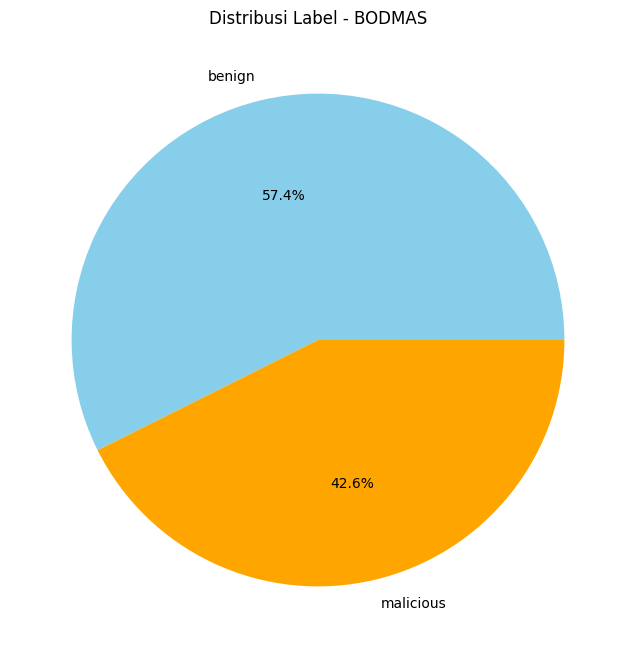

Deskripsi Distribusi Label - BODMAS:
benign       77138
malicious    57290
Name: Label, dtype: int64


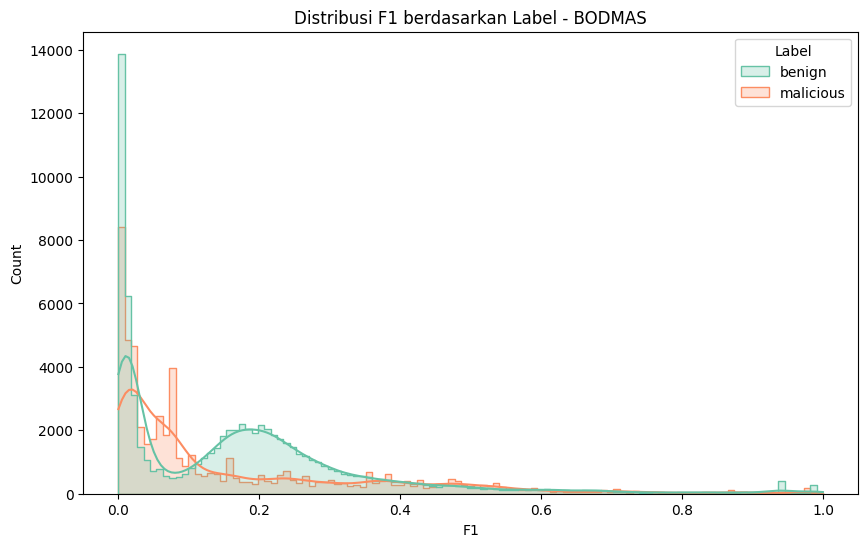


Deskripsi F1 - BODMAS:
             count      mean       std       min       25%       50%  \
Label                                                                  
benign     77138.0  0.181225  0.184813  0.001596  0.016725  0.161009   
malicious  57290.0  0.161095  0.197310  0.000127  0.019847  0.073303   

                75%       max  
Label                          
benign     0.252404  0.999983  
malicious  0.244167  0.999434  


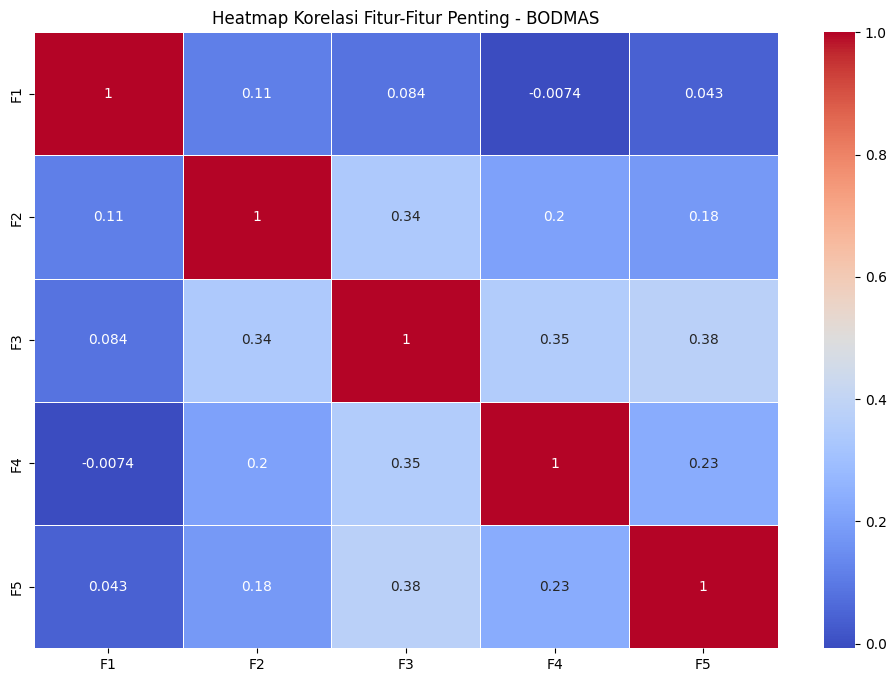


Deskripsi Korelasi Fitur - BODMAS:
          F1        F2        F3        F4        F5
F1  1.000000  0.113942  0.083680 -0.007414  0.042641
F2  0.113942  1.000000  0.341178  0.203506  0.179468
F3  0.083680  0.341178  1.000000  0.352244  0.376484
F4 -0.007414  0.203506  0.352244  1.000000  0.233201
F5  0.042641  0.179468  0.376484  0.233201  1.000000


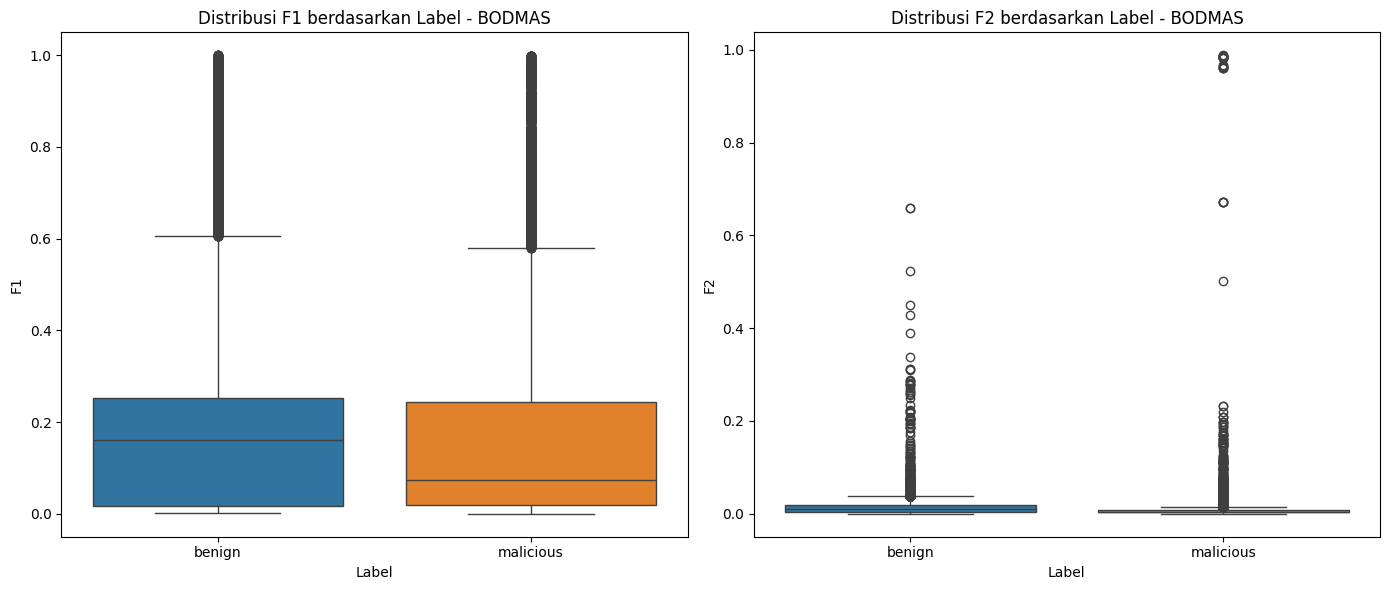


Deskripsi F1 dan F2 - BODMAS:
                F1                                                    \
             count      mean       std       min       25%       50%   
Label                                                                  
benign     77138.0  0.181225  0.184813  0.001596  0.016725  0.161009   
malicious  57290.0  0.161095  0.197310  0.000127  0.019847  0.073303   

                                    F2                                    \
                75%       max    count      mean       std           min   
Label                                                                      
benign     0.252404  0.999983  77138.0  0.012622  0.012261  4.840046e-07   
malicious  0.244167  0.999434  57290.0  0.006706  0.021440  5.647727e-06   

                                                   
                25%       50%       75%       max  
Label                                              
benign     0.004095  0.009756  0.017922  0.658342  
malicious  0.003011

In [7]:
# Visualisasi Distribusi Label
plt.figure(figsize=(8, 8))
df_BODMAS["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange', 'green'])
plt.title("Distribusi Label - BODMAS")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi Singkat Tentang Distribusi Label
print("Deskripsi Distribusi Label - BODMAS:")
label_counts = df_BODMAS["Label"].value_counts()
print(label_counts)

# Pilih fitur-fitur penting untuk analisis lebih lanjut (misalnya, F1 sampai F5)
features_of_interest_bodmas = ["F1", "F2", "F3", "F4", "F5"]

# Visualisasi Distribusi F1 berdasarkan Label
plt.figure(figsize=(10, 6))
sns.histplot(df_BODMAS, x="F1", hue="Label", element="step", palette="Set2", kde=True)
plt.title("Distribusi F1 berdasarkan Label - BODMAS")
plt.xlabel("F1")
plt.ylabel("Count")
plt.show()

# Deskripsi Singkat Tentang F1
print("\nDeskripsi F1 - BODMAS:")
print(df_BODMAS.groupby("Label")["F1"].describe())

# Heatmap Korelasi Fitur-Fitur Penting
plt.figure(figsize=(12, 8))
sns.heatmap(df_BODMAS[features_of_interest_bodmas].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting - BODMAS")
plt.show()

# Deskripsi Singkat Tentang Korelasi Fitur-Fitur Penting
print("\nDeskripsi Korelasi Fitur - BODMAS:")
print(df_BODMAS[features_of_interest_bodmas].corr())

# Visualisasi Boxplot untuk Distribusi F1 dan F2
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="F1", data=df_BODMAS, hue="Label")
plt.title("Distribusi F1 berdasarkan Label - BODMAS")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="F2", data=df_BODMAS, hue="Label")
plt.title("Distribusi F2 berdasarkan Label - BODMAS")

plt.tight_layout()
plt.show()

# Deskripsi Singkat Tentang Distribusi F1 dan F2
print("\nDeskripsi F1 dan F2 - BODMAS:")
print(df_BODMAS.groupby("Label")[["F1", "F2"]].describe())